In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
traffic_df = pd.read_csv('Traffic.csv')
traffic_df.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [67]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [68]:
sum(traffic_df.duplicated())

0

In [69]:
traffic_df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

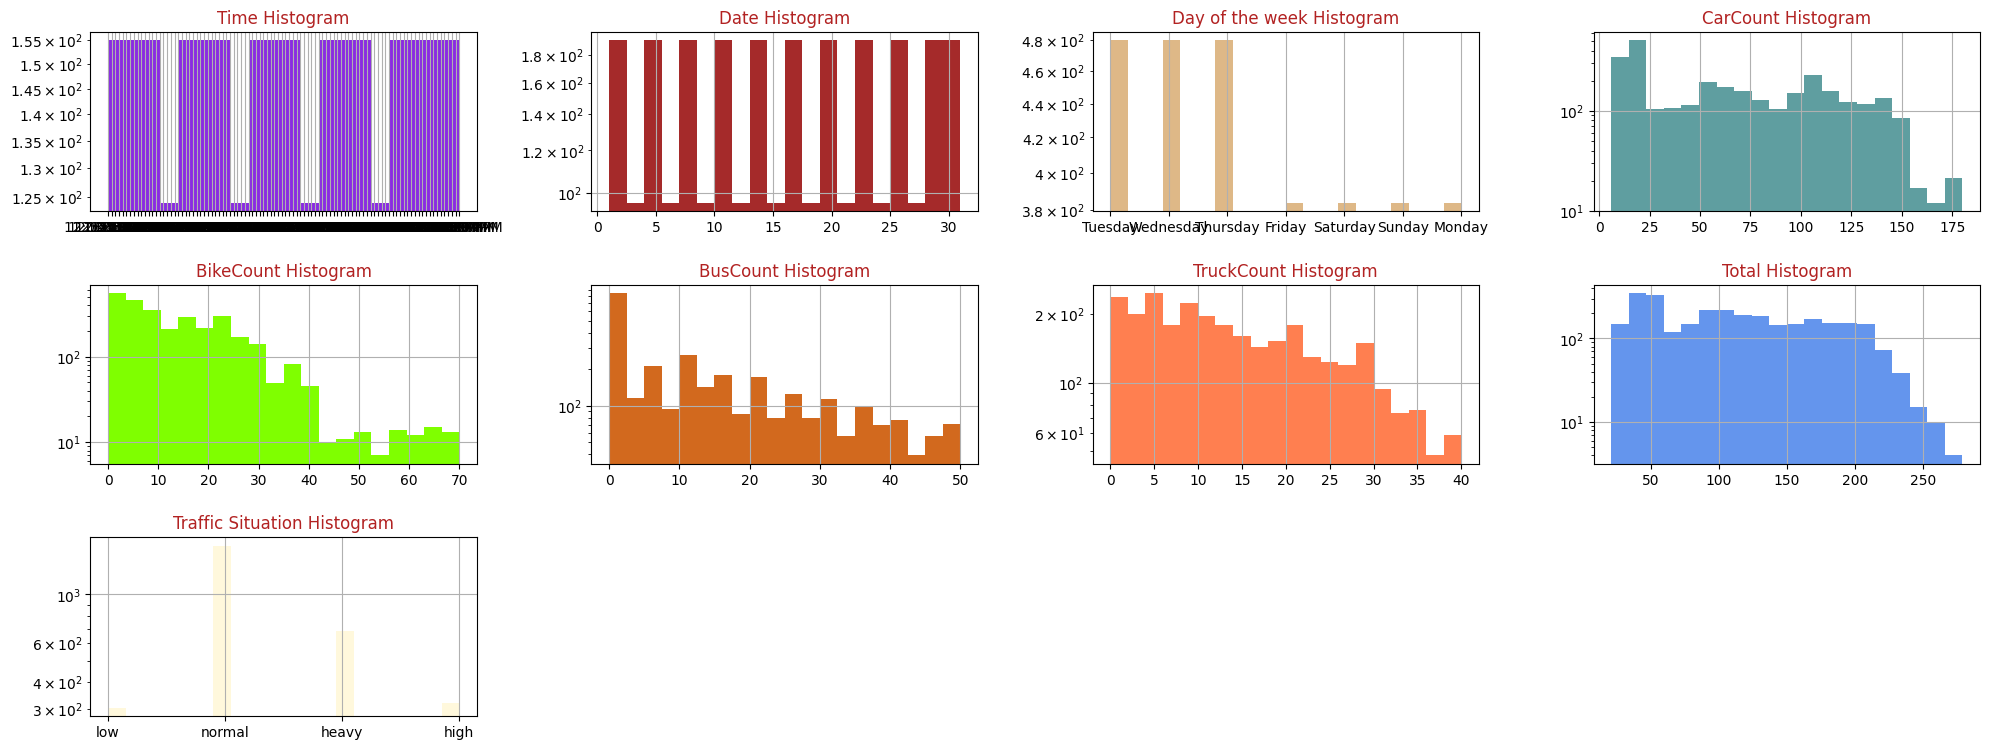

In [70]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(traffic_df.columns):
    f = fig.add_subplot(8, 4, i + 1)
    traffic_df[feature].hist(bins = 20, ax = f, facecolor = colors[i])
    f.set_title(feature + " Histogram", color = colors[35])
    f.set_yscale('log')
fig.tight_layout(h_pad=2,)
plt.show()

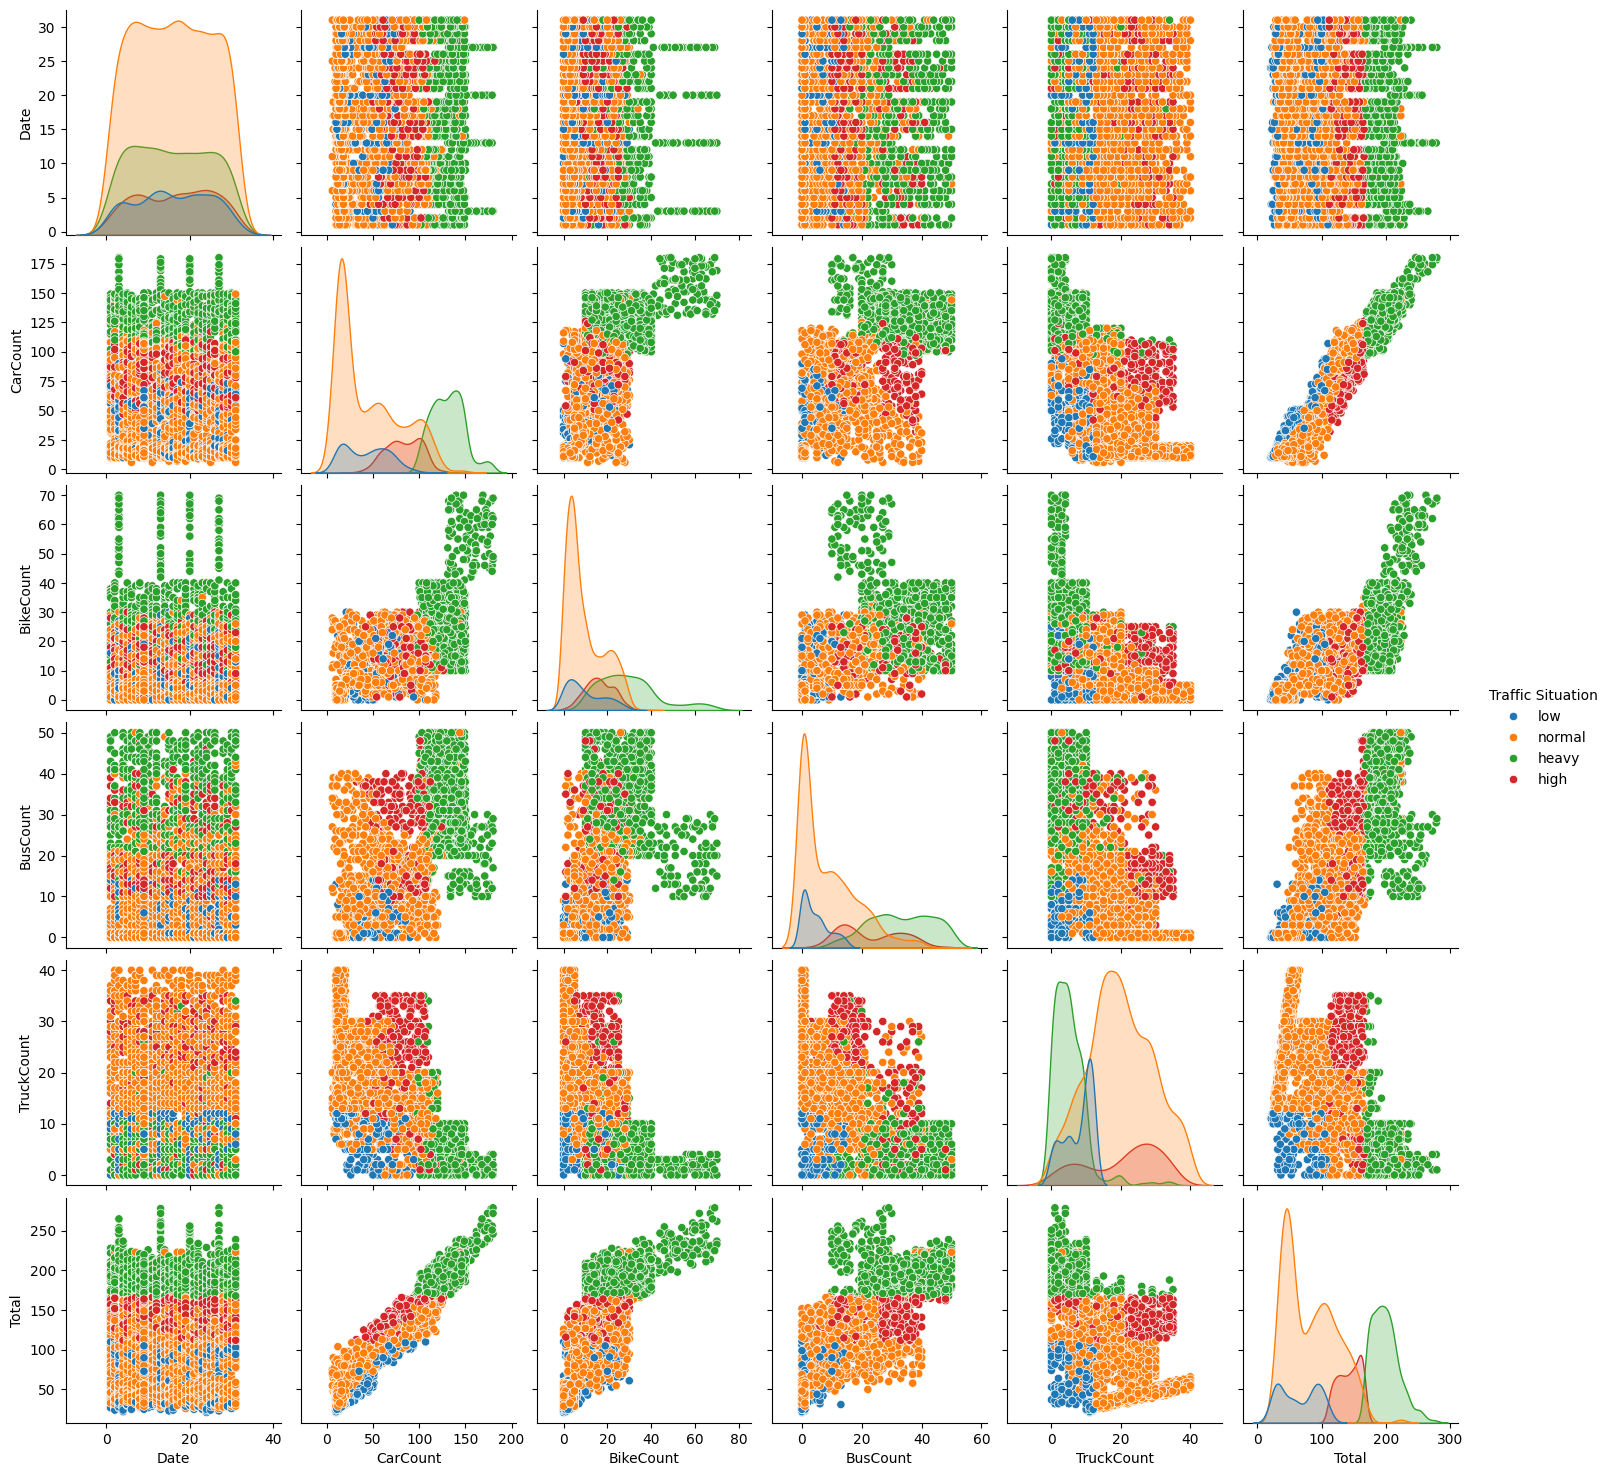

In [71]:
import seaborn as sns
sns.pairplot(data=traffic_df,hue='Traffic Situation')

<Axes: xlabel='Day of the week', ylabel='Count'>

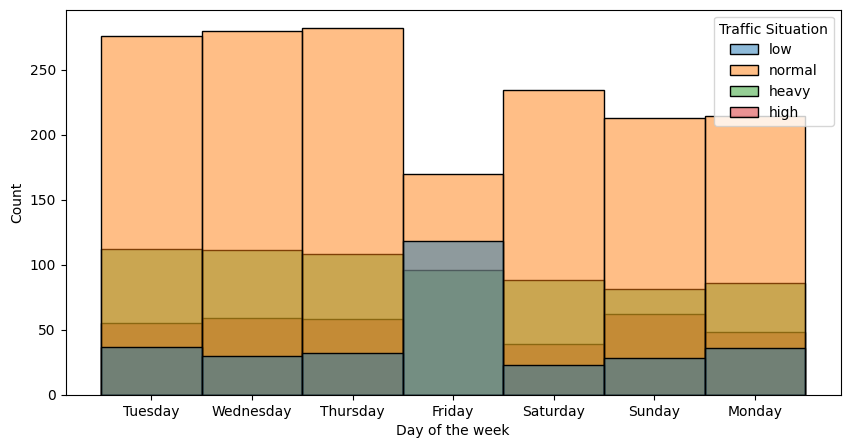

In [72]:
plt.figure(figsize=(10,5))
sns.histplot(data=traffic_df, x="Day of the week", hue="Traffic Situation")

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

traffic_situation_map = {'low':1, 'normal':2, 'high':3, 'heavy':4}
traffic_df['Traffic Situation'] = traffic_df['Traffic Situation'].map(traffic_situation_map)

print(traffic_df['Traffic Situation'].value_counts())
print(traffic_df['Traffic Situation'].unique())


Traffic Situation
2    1669
4     682
3     321
1     304
Name: count, dtype: int64
[1 2 4 3]
